# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [25]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def calc_slope(xs,ys):
    numer = np.mean(xs) * np.mean(ys) - np.mean(xs*ys)
    denom = (np.mean(xs)**2) - (np.mean(xs**2))
    return np.round(numer/denom, 3)

# use the slope function with intercept formula to return calculate slope and intercept from data points
def best_fit(xs,ys):
    slope_est = calc_slope(xs=xs, ys=ys)
    intercept_est = np.mean(ys) - (slope_est*np.mean(xs))
    return slope_est, np.round(intercept_est, 3)

def reg_line (m, c, xs):
    return [(m*x)+c for x in xs]

def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    rss = 0.0
    index = 0
    while index < len(y_real):
        diff_squared = (y_real[index] - y_predicted[index])**2
        rss += diff_squared
        index +=1
    return np.round(rss, decimals=3)

# Calculate Y_mean, squared error for regression and mean line , and calculate r-squared
def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    y_bar = np.mean(y_real)
    ssr = sq_err(y_real, y_predicted)
    sst = np.sum((y_real - y_real.mean())**2)  
    return np.round(1 - ssr/sst, 3)


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


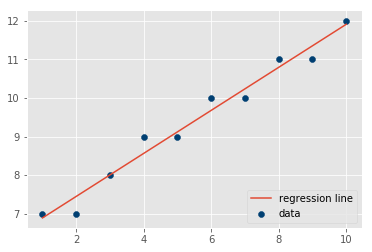

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

Basic Regression Diagnostics
------------------------------
Slope: 0.558
Y-intercept: 6.331
R-squared: 0.972
------------------------------
Model: Y = 0.558 * X + 6.331


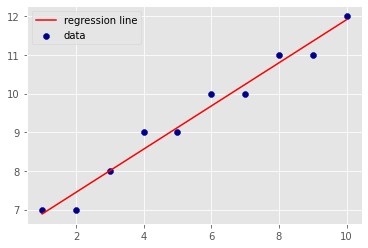

In [26]:
slope, y_intercept = best_fit(xs=X, ys=Y)
reg_line = reg_line(m=slope, c=y_intercept, xs=X)
r_squared = r_squared(y_real=Y, y_predicted=reg_line)

print('Basic Regression Diagnostics')
print('------------------------------')
print(f'Slope: {slope}')
print(f'Y-intercept: {y_intercept}')
print(f'R-squared: {r_squared}')
print('------------------------------')
print(f'Model: Y = {slope} * X + {y_intercept}')

plt.style.use('ggplot')
plt.scatter(x=X, y=Y, color='darkblue', label='data')
plt.plot(X, reg_line, color='red', label='regression line')
plt.legend()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

8.842


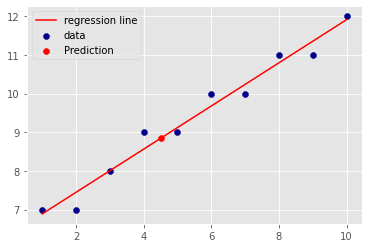

In [31]:
# Make prediction for x = 4.5 and visualize on the scatter plot


x_new = 4.5
y_predicted = (slope*x_new)+y_intercept
print(y_predicted)

plt.style.use('ggplot')
plt.scatter(x=X, y=Y, color='darkblue', label='data')
plt.plot(X, reg_line, color='red', label='regression line')
plt.scatter(x_new, y_predicted, color='red', label='Prediction')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 